In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn.datasets import fetch_openml
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
%matplotlib inline

In [3]:
tf.__version__

'2.13.0'

In [4]:
dataset = fetch_openml('mnist_784')

C:\Users\karti\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
type(dataset)

sklearn.utils._bunch.Bunch

In [6]:
print(dataset.data)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [7]:
print(dataset.target)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [8]:
X_ = pd.DataFrame(data = dataset.data, columns=dataset.feature_names)
y_ = pd.DataFrame(data = dataset.target, columns=dataset.target_names)

In [9]:
X = X_.to_numpy()
y = y_.to_numpy()

In [10]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
print(X, y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [['5']
 ['0']
 ['4']
 ...
 ['4']
 ['5']
 ['6']]


In [12]:
y=y.astype(float)

In [13]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000, 1)


Visualization of digits

In [14]:
print(X[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [15]:
print(y[0, 0])
print(y[-1, 0])

5.0
6.0


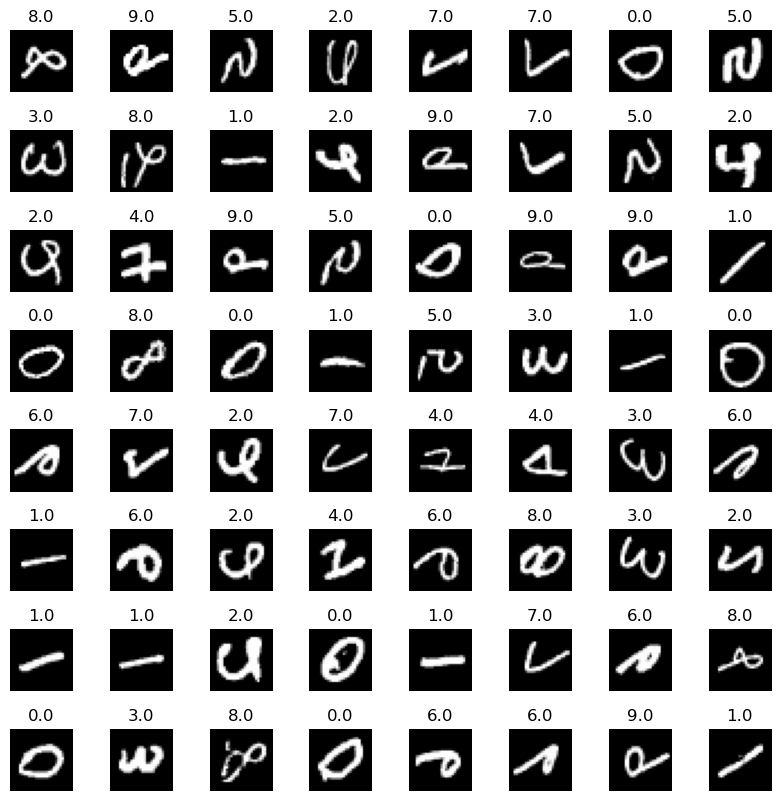

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [17]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X)

In [50]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(350, activation='relu'),
        Dense(50, activation='relu'),
        Dense(10, activation='softmax')
    ], name = "my_model"
)

In [51]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 350)               274750    
                                                                 
 dense_19 (Dense)            (None, 50)                17550     
                                                                 
 dense_20 (Dense)            (None, 10)                510       
                                                                 
Total params: 292810 (1.12 MB)
Trainable params: 292810 (1.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    Xn, y,
    epochs=20
)

Epoch 1/20


C:\Users\karti\anaconda3\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2188/2188 [==============================] - 9s 4ms/step - loss: 0.2108
Epoch 2/20
2188/2188 [==============================] - 8s 4ms/step - loss: 0.1035
Epoch 3/20
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0721
Epoch 4/20
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0587
Epoch 5/20
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0442
Epoch 6/20
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0429
Epoch 7/20
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0363
Epoch 8/20
2188/2188 [==============================] - 9s 4ms/step - loss: 0.0306
Epoch 9/20
2188/2188 [==============================] - 10s 4ms/step - loss: 0.0303
Epoch 10/20
2188/2188 [==============================] - 9s 4ms/step - loss: 0.0307
Epoch 11/20
2188/2188 [==============================] - 9s 4ms/step - loss: 0.0318
Epoch 12/20
2188/2188 [==============================] - 9s 4ms/step - loss: 0.0296
Epoch 13/20

In [53]:
[layer1, layer2, layer3] = model.layers

In [54]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 350), b1 shape = (350,)
W2 shape = (350, 50), b2 shape = (50,)
W3 shape = (50, 10), b3 shape = (10,)


In [55]:
print(model.layers[2].weights)

[<tf.Variable 'dense_20/kernel:0' shape=(50, 10) dtype=float32, numpy=
array([[ 0.33758947, -0.07304282,  0.09657645, -0.08799774, -0.01857821,
         0.08665581, -0.02048195, -0.27092662, -0.04375474, -0.22836976],
       [-0.20542042, -0.08091184,  0.12570968,  0.07877442,  0.17739472,
         0.0539703 , -0.14835674,  0.09748144, -0.27431846,  0.15596774],
       [-0.12768067, -0.41275218, -0.05949531, -0.06543673,  0.03122917,
         0.14675611,  0.13507561, -0.05679249,  0.17566372,  0.14143686],
       [-0.35829306,  0.01063131, -0.14039576,  0.00727768, -0.19006047,
        -0.21376668, -0.09288599, -0.1806617 ,  0.08311068, -0.17594658],
       [-0.2990514 , -0.06094322, -0.19202317, -0.26133993, -0.07342256,
        -0.15353714, -0.2644644 ,  0.1288108 , -0.29734045, -0.01739986],
       [ 0.11056449,  0.08581664, -0.01718527, -0.05843838,  0.19913788,
        -0.08757783, -0.20415473,  0.05026864,  0.16647096,  0.15267164],
       [-0.21443601,  0.02261617, -0.2143234 , 

In [62]:
prediction = model.predict(X[7899].reshape(1,784))
print(prediction)

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [64]:
yhat = np.argmax(prediction)
print(yhat)
print(y[7899,0])

7
7.0


1/1 [==============================] - 0s 20ms/step


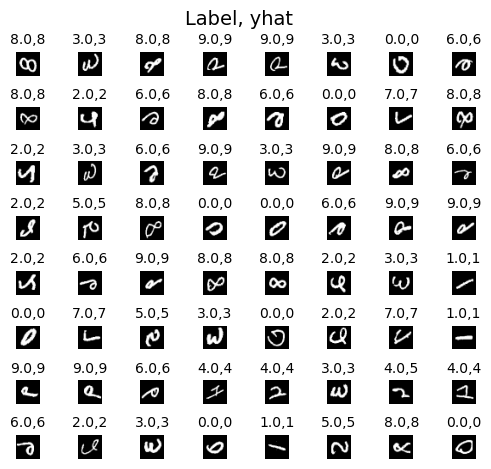

In [71]:
m,n = X.shape
fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
# fig.canvas.toolbar_visible = False
# fig.canvas.header_visible = False
# fig.canvas.footer_visible = False

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((28, 28)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    prediction = model.predict(X[random_index].reshape(1, 784))
    yhat = np.argmax(prediction)
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [75]:
y_pred = model.predict(Xn)

2188/2188 [==============================] - 2s 937us/step


In [76]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[6902,    0,    0,    0,    0,    0,    1,    0,    0,    0],
       [   3, 7841,    4,    1,   11,    2,    1,    6,    6,    2],
       [  14,    2, 6938,   10,    1,    2,    9,    5,    9,    0],
       [   0,    0,    3, 7113,    0,   15,    0,    5,    3,    2],
       [   3,    0,    1,    0, 6809,    2,    1,    4,    3,    1],
       [   1,    0,    0,    7,    0, 6297,    0,    0,    7,    1],
       [   8,    0,    1,    0,    1,    8, 6858,    0,    0,    0],
       [   0,    3,    9,    3,    1,    1,    0, 7272,    1,    3],
       [   4,    0,    2,    6,    3,    4,    0,    5, 6794,    7],
       [   2,    0,    1,    4,    8,    7,    0,   15,    0, 6921]])>

Text(95.72222222222221, 0.5, 'Truth')

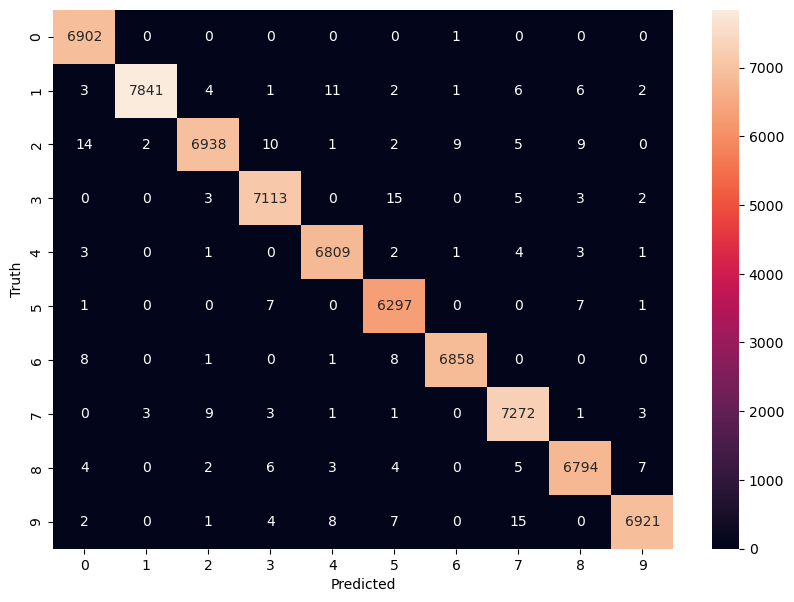

In [77]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')